# Python Group 16 - Max Holiber, Tian Fu

# Exercise 1 – BABY NAMES BY STATE and YEAR

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [40]:
class BabyNames:
    # constructor
    # Input: file path
    def __init__(self, path):
        self.df = pd.DataFrame()
        allFiles = os.listdir(path) # Return a list containing the names of the entries in the directory given by path
        newList = [] # empty list to store dataframes
        columns = ['state','sex','year','name','births'] # column names
        for file in allFiles:
            if file[-3:]=='TXT': # read all TXT tiles in the folder specified by path
                d = pd.read_csv(path+file,names=columns) # read the table for one state and create a dataframe
                newList.append(d)
        self.df = pd.concat(newList,ignore_index = True) # concat df's with same data structure
        
    
    def Count(self, state="", year=""):
        '''
        This function returns the total number of births in a given state for a given year.
        Inputs: State Abbreviation, Year; Default Values are blank
        Output: A number corresponding to the count of total births for the given inputs
        '''
        if state=="":
            if year=="":
                return self.df['births'].sum() # sum number of births in all states and all years
            else:
                # sum number of births in all states and in the specified years
                return self.df[self.df.year==year]['births'].sum()
        else:
            # sum number of births in the specified states over all years
            if year=="":
                return self.df[self.df.state==state]['births'].sum()
            else:
                # sum number of births in the specified state in the specified years
                return self.df[(self.df.state==state) & (self.df.year==year)]['births'].sum()

    
    def Top10BabyNames(self,state="",year=""):
        '''
        This function returns a dataframe that includes top 10 popular male and female names
        in a given state for a given year.
        Inputs: Abbreviated State and Year, default values are blank
        Output: A dataframe containing the top 10 boy and girl names by number of births for the user inputs
        '''
        if state=="":
            if year=="":
                male = self.df[self.df.sex=='M'] # filter out female names
                # for each male name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                male = male.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                male.rename(columns={'name':'Male','births':'births'}, inplace=True)
                male = pd.DataFrame(male.Male)
                female = self.df[self.df.sex=='F'] # filter out male names
                # for each female name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                female = female.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                female.rename(columns={'name':'Female','births':'births'}, inplace=True)
                female = pd.DataFrame(female.Female)
                # join data frames for two genders based on their indices
                top10 = pd.merge(male, female, left_index=True,right_index=True, how='inner')
                top10['Rank'] = top10.reset_index().index + 1 # rank each name
                return top10
            else:
                # choose one specific year and filter out female names
                male = self.df[(self.df.sex=='M') & (self.df.year==year)]
                # for each male name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                male = male.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                male.rename(columns={'name':'Male','births':'births'}, inplace=True)
                male = pd.DataFrame(male.Male)
                # choose one specific year and filter out male names
                female = self.df[(self.df.sex=='F') & (self.df.year==year)]
                # for each female name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                female = female.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                female.rename(columns={'name':'Female','births':'births'}, inplace=True)
                female = pd.DataFrame(female.Female)
                # join data frames for two genders based on their indices
                top10 = pd.merge(male, female, left_index=True,right_index=True, how='inner')
                top10['Rank'] = top10.reset_index().index + 1 # rank each name
                return top10
        else:
            if year=="":
                # choose one specific state and filter out female names
                male = self.df[(self.df.sex=='M') & (self.df.state==state)]
                # for each male name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                male = male.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                male.rename(columns={'name':'Male','births':'births'}, inplace=True)
                male = pd.DataFrame(male.Male)
                # choose one specific state and filter out male names
                female = self.df[(self.df.sex=='F') & (self.df.state==state)]
                # for each female name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                female = female.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                female.rename(columns={'name':'Female','births':'births'}, inplace=True)
                female = pd.DataFrame(female.Female)
                # join data frames for two genders based on their indices
                top10 = pd.merge(male, female, left_index=True,right_index=True, how='inner')
                top10['Rank'] = top10.reset_index().index + 1 # rank each name
                return top10
            else:
                # choose one specific state for a given year and filter out female names
                male = self.df[(self.df.sex=='M') & (self.df.state==state) & (self.df.year==year)]
                # for each male name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                male = male.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                male.rename(columns={'name':'Male','births':'births'}, inplace=True)
                male = pd.DataFrame(male.Male)
                # choose one specific state for a given year and filter out male names
                female = self.df[(self.df.sex=='F') & (self.df.state==state) & (self.df.year==year)]
                # for each female name, calculate total number of births and order them descendingly by number of total births
                # display top 10 names
                female = female.groupby('name').agg({'births':'sum'}).sort_values(by='births',ascending=False).reset_index().head(10)
                female.rename(columns={'name':'Female','births':'births'}, inplace=True)
                female = pd.DataFrame(female.Female)
                # join data frames for two genders based on their indices
                top10 = pd.merge(male, female, left_index=True,right_index=True, how='inner')
                top10['Rank'] = top10.reset_index().index + 1 # rank each name
                return top10
    

    def ChangeOfPopularity(self, fromYear, toYear, top):
        '''
        This function returns a dataframe that includes top baby names changing popularity,
        regardless of sex.
        Definition of change in popularity: number of births in toYr - number of births in fromYr
        for a particular name.
        Assumption: parameters will not be empty.
        Inputs: fromYear (start of date range to check popularity)
                toYear (end of date range to check popularity)
                top (show top n names)
        Outputs: Data frame showing the top n names that increased, decreased, remained the same in number of births
                 between the two year of the date range
        '''
        # a dataframe displaying only name and sum of births for each name in the year specified by fromYear
        frYr = self.df[self.df.year==fromYear][['name','births']].groupby('name').sum().reset_index()
        # a dataframe displaying only name and sum of births for each name in the year specified by toYear
        toYr = self.df[self.df.year==toYear][['name','births']].groupby('name').sum().reset_index()
        # join two data frames based on name
        merged = pd.merge(frYr, toYr, left_on='name', right_on='name',
                     suffixes=('_fr', '_to'), how='inner')
        # create a new column displaying difference in total births for each name between two years
        merged['diff'] = merged['births_to'] - merged['births_fr'] 
        
        # a difference greater than 0 means that total births of that name increases
        increase_df = merged[merged['diff']>0].sort_values(by='diff', ascending=False).head(top).reset_index()
        # a difference less than 0 means that total births of that name decreases
        decrease_df = merged[merged['diff']<0].sort_values(by='diff', ascending=True).head(top).reset_index()
        equal_df = merged[merged['diff']==0].head(top).reset_index()
        
        inc = pd.DataFrame(increase_df['name']) # transform a Series to a data frame
        inc.rename(columns={'name':'Increase'}, inplace=True)
        dec = pd.DataFrame(decrease_df['name']) # transform a Series to a data frame
        dec.rename(columns={'name':'Decrease'}, inplace=True)
        equal = pd.DataFrame(equal_df['name']) # transform a Series to a data frame
        equal.rename(columns={'name':'Equal'}, inplace=True)
        
        # join three dataframes based on their ranking indices
        pop = pd.merge(pd.merge(inc, dec, left_index=True, right_index=True, how='inner'),
                       equal,left_index=True, right_index=True, how='inner')
        
        return pop # return summarized table with names that change in popularity
    

    def Top5NamesPerYear(self,year,sex=""):
        '''
        This function a table that show the five most frequent given names,
        by State, for male, female, or both in a given year.
        Inputs: year, sex (default value is blank)
        Outputs: Dataframe showing the top 5 names by number of births for each state, given the year and sex user inputs
        '''
        if sex=="":
            # for the given year, for each state, count the total number of births for each name
            top = self.df[self.df.year==year].groupby(['state','name']).agg({'births': 'sum'}).reset_index()
            # sort by state names ascendingly and by number of births descendingly
            top = top.sort_values(by=['state','births'], ascending=[True,False]).reset_index()
            top = top[['state','name','births']]
            top['rank'] = top.groupby('state').cumcount()+1 # within each state, rank total number of births across names
            top = top[top['rank']<=5][['state','name','births','rank']] # display top five names for each state
        else:
            # for the given year and gender, for each state, count the total number of births for each name
            top = self.df[(self.df.year==year)&(self.df.sex==sex)].groupby(['state','name']).agg({'births': 'sum'}).reset_index()
            # sort by state names ascendingly and by number of births descendingly
            top = top.sort_values(by=['state','births'], ascending=[True,False]).reset_index()
            top = top[['state','name','births']]
            top['rank'] = top.groupby('state').cumcount()+1 # within each state, rank total number of births across names
            top = top[top['rank']<=5][['state','name','births','rank']] # display top five names for each state
        
        # create a pivot data frame based on state and use rank as columns, display names for each rank
        pivot1 = top.pivot(index='state',columns='rank',values='name')
        # create a pivot data frame based on state and use rank as columns, display number of births for each rank
        pivot2 = top.pivot(index='state',columns='rank',values='births')
        # merge two data frames based on indices and reset the index of merged data frame
        top_merged = pd.merge(pivot1,pivot2,left_index=True,right_index=True,how='inner').reset_index()
        
        cols = top_merged.columns.tolist() # get list of column names
        # rearrange columns so that each name and its number of births appear together
        cols = ['state', '1_x', '1_y', '2_x', '2_y', '3_x','3_y', '4_x','4_y', '5_x','5_y']
        top_merged = top_merged[cols].rename(columns={'1_x':'Rank1','1_y':'Num',
                                                      '2_x':'Rank2','2_y':'Num',
                                                      '3_x':'Rank3','3_y':'Num',
                                                      '4_x':'Rank4','4_y':'Num',
                                                      '5_x':'Rank1','5_y':'Num'})
        
        return top_merged
    

    def NamePopularityPlot(self, name, yearRange, state, sex):
        '''
        This function will create a plot file that shows the name popularity changes over the year.
        (popularity is based on the proportional use of the name within a state and year)
        Inputs: name
                yearRange - this is a tuple of format (year_start, year_end)
                state
                sex
        Outputs: a line plot that shows teh name popularity over time for the user defined inputs
        '''
        x_year = [] # a list to store years within yearRange specified by user
        y_prop = [] # a list to store proportions
        for i in range(yearRange[0], yearRange[1]+1):
            x_year.append(i)
        for i in x_year:
            # for the given name, year, state, and gender, sum total number of births
            value1 = self.df[(self.df.name==name)&(self.df.year==i)&(self.df.state==state)&(self.df.sex==sex)]['births'].sum()
            # sum total number of births within a state in a year
            value2 = self.df[(self.df.year==i)&(self.df.state==state)]['births'].sum()
            # store proportion of births for the given name and sex in the list
            y_prop.append(value1/value2)
            
        plt.plot(x_year, y_prop) # plot years and corresponding proportions
        plt.title('Name Popularity Changes Over the Years')
        plt.xlabel('Year')
        plt.ylabel('Proportional Use of the Name')
        plt.show() # display performance of three sort methods
    

    def NameFlip(self, n):
        '''
        This function draws the proportion of female and male for top n names that flipped the most over all years. 
        (one line for male proportion and one line for femaale proportion). When two lines cross, there is a flip.
        Definition of a flip: we consider a flip as a change in proportion of male or female 
        during consecutive years for one particular name. For example, male's proportion changes from less than 50% to
        larger than 50% or male's proportion changes from more than 50% to less than 50% in two consecutive years
        is considered to be a flip in this case.
        
        for example: if the name jordan was 20% Male in 2011, and 80% Male in 2012, this is a flip
        for example: if the name jordan was 51% Male in 2011, and 90% Male in 2012, this is NOT a flip, as the
                     majority proportion by gender remains the same year over year
                     
        Inputs: n (to show the top n names by number of flips)
        Output: plots showing top n names' proportion of female and male over time
        '''
        # for each year, for every name, sum the number of births of male and female and store it in a dataframe
        flip = self.df.groupby(['name','year','sex']).agg({'births': 'sum'}).reset_index()
        # pivot the data frame using name and year as indices and gender as column name, values of number of aggregated births
        # fill in null values as 0 and reset index
        flip2 = flip.pivot_table(index=['name','year'],columns='sex',values='births').fillna(0).reset_index()
        flip2['yearPlus'] = flip2['year']+1 # a new column showing next year
        flip2['p_female'] = flip2['F'] / (flip2['F']+flip2['M']) # a new column which is the proporation of female
        flip2['p_male'] = flip2['M'] / (flip2['F']+flip2['M']) # a new column which is the proporation of male
        
        # self join the data frame so that proportions of male and female for two consecutive years
        # are displayed together for later comparison
        flip3 = flip2.merge(flip2, left_on = ['name', 'yearPlus'], right_on = ['name', 'year'], how = 'inner')
        flip3 = flip3[['name','year_x','p_female_x','p_male_x','year_y','p_female_y','p_male_y']]
        # create a new column with boolean values
        # flip is True if male's proportion changes from less than 50% to larger than 50% 
        # or male's proportion changes from more than 50% to less than 50% in two consecutive years
        flip3['flip']=((flip3['p_male_x']>0.5) & (flip3['p_male_y']<0.5))|((flip3['p_male_x']<0.5) & (flip3['p_male_y']>0.5))
        
        # count number of flips for each name and show it in the data frame
        flip4 = flip3[flip3['flip']==True].groupby('name').count().reset_index()
        flip4 = flip4[['name','flip']]
        flip4 = flip4.sort_values(by='flip',ascending=False).head(n) # top n names that flipped most
        
        topnames = flip4['name'].tolist()
        for nm in topnames:
            flip_filter = flip2[flip2['name']==nm] # filter out other names, only showing input name
            flip_plot = flip_filter[['year','p_female','p_male']]
        
            years = flip_plot['year'].tolist() # years are used as x-axis
            male = flip_plot['p_male'].tolist() # y-axis values for male
            female = flip_plot['p_female'].tolist() # y-axis values for female
            plt.plot(years, male, label='male')
            plt.plot(years, female, label='female')
            plt.legend()
            plt.title('Name Popularity Changes Over the Years for ' + nm)
            plt.xlabel('Year')
            plt.ylabel('Proportion')
            plt.show() # display the plot

   
    def diversity(self, state=""):
        '''
        This function draws the number of unique female and male names for a particular state over all years.
        Input: state abbreviation, default is empty
        Output: plot showing number of unique female and male names for a state over years
        ''' 
        if state=="":
            # for each year and sex, count number of unique names across all states
            data_df = self.df.groupby(['year','sex']).name.nunique()   
        else:
            # for each year and sex, count number of unique names for a particular state
            data_df = self.df[self.df['state']==state].groupby(['year','sex']).name.nunique()   

        data_df = pd.DataFrame(data=data_df).reset_index() # transform Series to a DataFrame and reset indices
        years = data_df['year'].unique() # for every year
        male  = data_df[data_df['sex']=='M']['name'].tolist() # filter the data frame to contain only count of unique male names
        female  = data_df[data_df['sex']=='F']['name'].tolist() # filter the data frame to contain only count of unique female names
        
        plt.plot(years, male, label='male') # plot for number of unique male names over years
        plt.plot(years, female, label='female') # plot for number of unique female names over years
        plt.legend()
        plt.title('Diversity Distribution') # title of the plot
        plt.xlabel('Year') # x-axis
        plt.ylabel('Count') # y-axis
        plt.show() # display the plot
        

### test cases

#### 2 a) create a constructor

In [41]:
path = './namesbystate/'
b = BabyNames(path)
type(b)

__main__.BabyNames

#### 2 b)

In [42]:
b.Count(state="CA", year=2012)

438934

In [43]:
b.Count(year=2012)

3080220

In [44]:
b.Count()

308180519

#### 2 c)

In [45]:
c = BabyNames(path)

In [46]:
test_c1 = c.Top10BabyNames(state="NY",year=2010)
test_c1

,Male,Female,Rank
0,Michael,Isabella,1
1,Jayden,Sophia,2
2,Jacob,Olivia,3
3,Ethan,Emma,4
4,Joseph,Ava,5
5,Daniel,Madison,6
6,Anthony,Emily,7
7,Matthew,Mia,8
8,Ryan,Abigail,9
9,Alexander,Chloe,10


In [47]:
test_c2 = c.Top10BabyNames(state="NY")
test_c2

,Male,Female,Rank
0,John,Mary,1
1,Robert,Patricia,2
2,Michael,Barbara,3
3,James,Elizabeth,4
4,Joseph,Susan,5
5,William,Margaret,6
6,David,Linda,7
7,Richard,Jennifer,8
8,Thomas,Nancy,9
9,Anthony,Helen,10


In [48]:
test_c3 = c.Top10BabyNames()
test_c3

,Male,Female,Rank
0,James,Mary,1
1,John,Patricia,2
2,Robert,Elizabeth,3
3,Michael,Jennifer,4
4,William,Linda,5
5,David,Barbara,6
6,Richard,Margaret,7
7,Joseph,Susan,8
8,Charles,Dorothy,9
9,Thomas,Jessica,10


#### 2 d)

In [49]:
d = BabyNames(path)

In [50]:
test_d1 = b.ChangeOfPopularity(1950,1970,8)
test_d1

,Increase,Decrease,Equal
0,Jennifer,Linda,Anselmo
1,Lisa,Mary,Antone
2,Christopher,Patricia,Apolonio
3,Kimberly,Barbara,Benuel
4,Michelle,Robert,Camelia
5,Brian,James,Clemencia
6,Jason,Larry,Conchita
7,Scott,Gary,Creighton


In [51]:
test_d2 = b.ChangeOfPopularity(1999,2000,15)
test_d2

,Increase,Decrease,Equal
0,Ethan,Austin,Ab
1,Trinity,Brittany,Adalia
2,Sebastian,Taylor,Adamari
3,Hailey,Michael,Adham
4,Chloe,Matthew,Aissatou
5,Grace,Kyle,Akili
6,Madison,Samantha,Alandra
7,Olivia,Kiara,Aleen
8,Jalen,Sarah,Aleida
9,Anna,Courtney,Aleisha


#### 2 e)

In [52]:
e = BabyNames(path)

In [53]:
test_e1 = e.Top5NamesPerYear(year=1992)
test_e1

rank,state,Rank1,Num,Rank2,Num,Rank3,Num,Rank4,Num,Rank1,Num
0,AK,Michael,159,Christopher,123,Tyler,108,Jessica,102,Joshua,98
1,AL,Christopher,747,Joshua,698,James,683,Jessica,660,William,655
2,AR,Jessica,382,Ashley,375,Christopher,375,Tyler,368,Joshua,362
3,AZ,Michael,854,Jessica,662,Christopher,639,Ashley,595,Joshua,566
4,CA,Michael,6691,Jessica,6384,Daniel,5415,Christopher,5267,Jose,5119
5,CO,Michael,744,Joshua,542,Christopher,527,Tyler,494,Jessica,492
6,CT,Michael,910,Matthew,665,Christopher,606,Nicholas,512,Daniel,509
7,DC,Michael,247,Christopher,181,John,159,James,149,Ashley,137
8,DE,Michael,191,Matthew,144,Christopher,128,James,115,Tyler,113
9,FL,Michael,2911,Christopher,2377,Ashley,2066,Jessica,1917,Joshua,1865


In [54]:
test_e2 = e.Top5NamesPerYear(year=2012, sex='F')
test_e2

rank,state,Rank1,Num,Rank2,Num,Rank3,Num,Rank4,Num,Rank1,Num
0,AK,Emma,57,Sophia,56,Olivia,49,Abigail,38,Ava,32
1,AL,Emma,320,Ava,242,Olivia,228,Isabella,198,Madison,191
2,AR,Emma,186,Sophia,165,Ava,139,Isabella,136,Olivia,133
3,AZ,Sophia,589,Isabella,490,Emma,394,Mia,374,Olivia,356
4,CA,Sophia,3643,Isabella,3109,Emma,2450,Emily,2438,Mia,2329
5,CO,Emma,337,Sophia,331,Olivia,317,Isabella,259,Ava,231
6,CT,Emma,246,Olivia,235,Isabella,234,Sophia,227,Ava,185
7,DC,Sophia,50,Emma,42,Olivia,40,Charlotte,38,Genesis,34
8,DE,Sophia,67,Isabella,65,Emma,63,Olivia,52,Ava,51
9,FL,Isabella,1586,Sophia,1374,Emma,1071,Olivia,911,Mia,852


#### 2 f)

In [55]:
f = BabyNames(path)

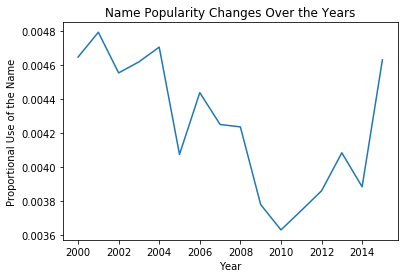

In [56]:
f.NamePopularityPlot('James', (2000,2015), 'IL', 'M')

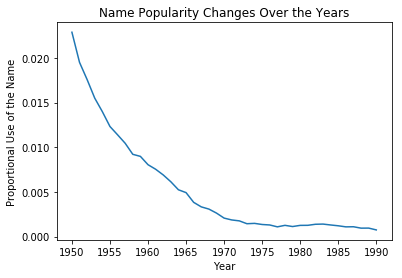

In [57]:
f.NamePopularityPlot('Linda', (1950,1990), 'CA', 'F')

#### 2 g)

In [58]:
g = BabyNames(path)

##### test 1 - top 5 flips

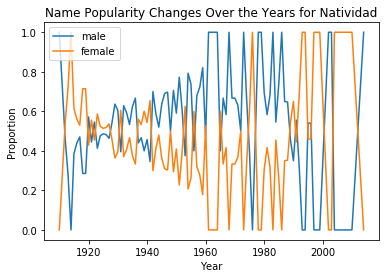

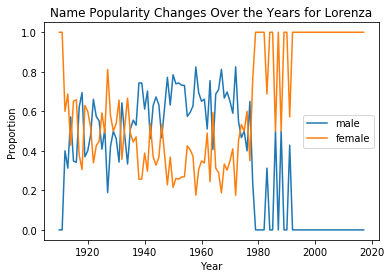

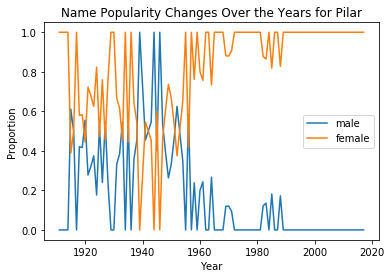

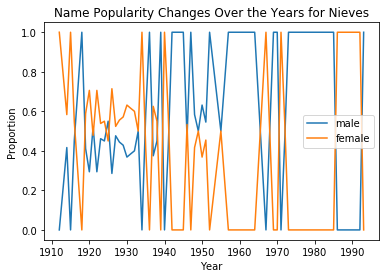

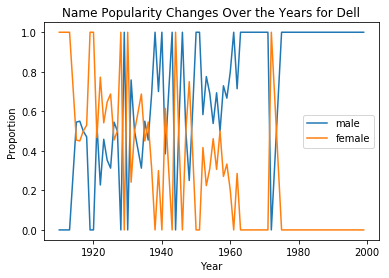

In [59]:
g.NameFlip(5) # plots for top 5 most flipped names

##### test 2 - top 10 flips

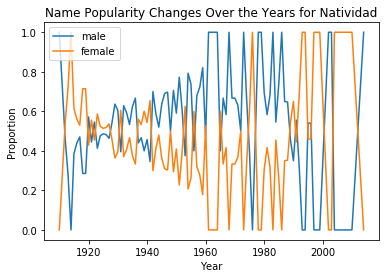

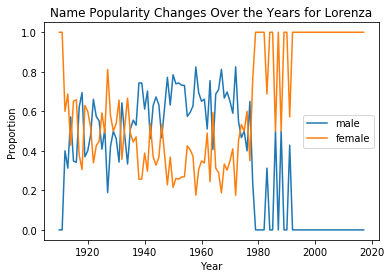

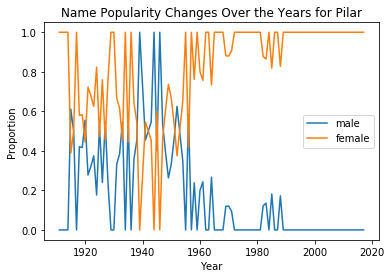

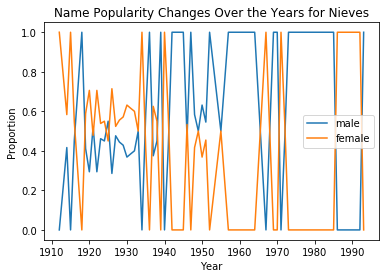

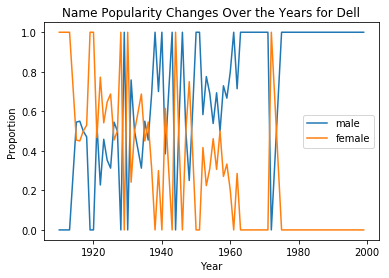

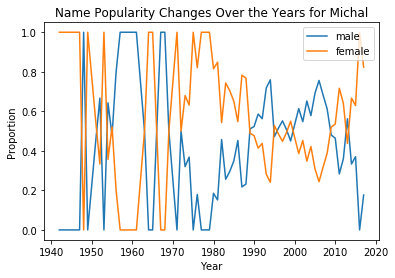

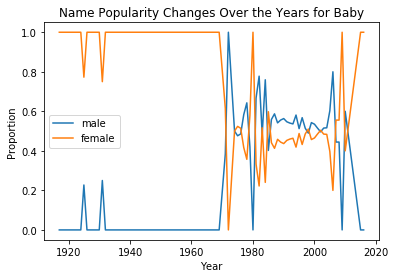

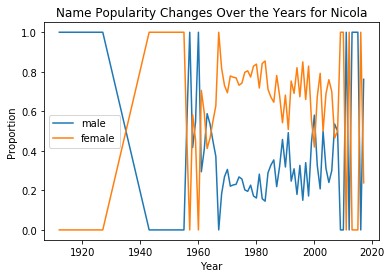

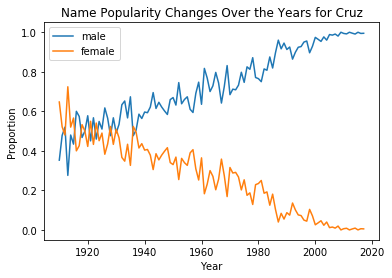

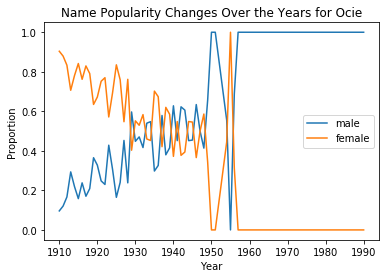

In [60]:
g.NameFlip(10) # plots for top 10 most flipped names

## Own Story - Diversity of Names Over Years

##### we want to show number of distinct names used across time for each gender, we anticipate to see more diversity as time goes on

In [61]:
h = BabyNames(path)

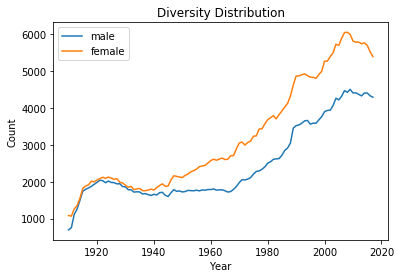

In [62]:
h.diversity()

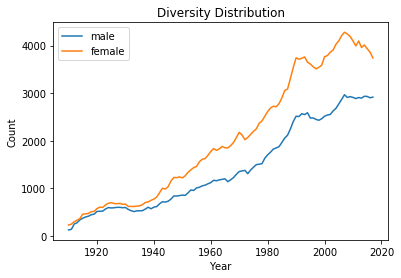

In [63]:
h.diversity("CA")

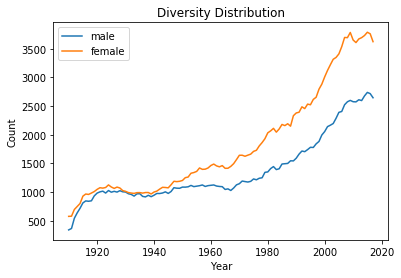

In [64]:
h.diversity("TX")

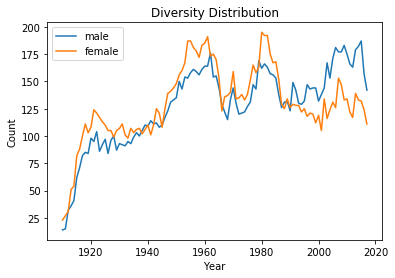

In [65]:
h.diversity("WY")

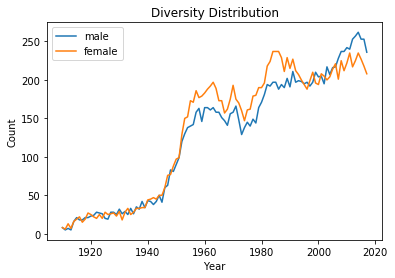

In [66]:
h.diversity("AK")

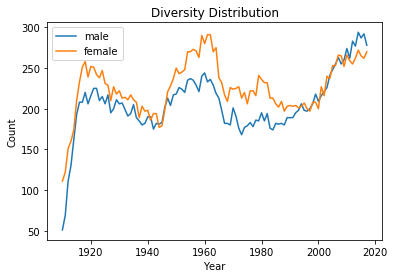

In [67]:
h.diversity("SD")

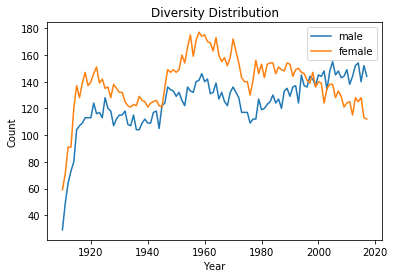

In [68]:
h.diversity('VT')

## Overall, starting around 1940, there are more unique female names than male names and the gap is increasing over years. We then investigated diversity in both small and big states, and found interesting results. In states with large population such as California and Texas, the name diversity follows the overall trend. However, in small states such as Wyoming, Vermont and Alaska, there is a very small gap in diversity between male and female names. Recently, there are more unique males which is opposite to overall trend.

# Exercise 2 – Pandas

In [31]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

In [32]:
cnx = pymysql.connect(user='root', \
      password='cHAmp@R7', \
      host= 'localhost', \
      port=3306, \
      db='world', \
      autocommit=True)

In [33]:
df_country = pd.read_sql_query('select * from Country', con=cnx,index_col='Code')
df_city = pd.read_sql_query('select * from city', con=cnx,index_col='ID')
df_countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx,index_col=['CountryCode','Language'])

## question 1

In [34]:
# choose countries with population greater than 50000000 and sorted descendingly them based on population
# then list 10 countries with largest popultion
df_country[df_country['Population']>50000000].sort_values(by='Population', ascending=False).head(10)

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US
IDN,Indonesia,Asia,Southeast Asia,1904569.0,1945.0,212107000,68.0,84982.0,215002.0,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947.0,156483000,61.1,61289.0,58549.0,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP


#### compare with SQL commands

In [17]:
cursor = cnx.cursor()
command = "SELECT * FROM Country WHERE Population>50000000 ORDER BY Population DESC LIMIT 10"
cursor.execute(command)
ans= cursor.fetchall()  
  
# loop to print all the data 
for i in ans: 
    print(i)

('CHN', 'China', 'Asia', 'Eastern Asia', 9572900.0, -1523, 1277558000, 71.4, 982268.0, 917719.0, 'Zhongquo', "People'sRepublic", 'Jiang Zemin', 1891, 'CN')
('IND', 'India', 'Asia', 'Southern and Central Asia', 3287263.0, 1947, 1013662000, 62.5, 447114.0, 430572.0, 'Bharat/India', 'Federal Republic', 'Kocheril Raman Narayanan', 1109, 'IN')
('USA', 'United States', 'North America', 'North America', 9363520.0, 1776, 278357000, 77.1, 8510700.0, 8110900.0, 'United States', 'Federal Republic', 'George W. Bush', 3813, 'US')
('IDN', 'Indonesia', 'Asia', 'Southeast Asia', 1904569.0, 1945, 212107000, 68.0, 84982.0, 215002.0, 'Indonesia', 'Republic', 'Abdurrahman Wahid', 939, 'ID')
('BRA', 'Brazil', 'South America', 'South America', 8547403.0, 1822, 170115000, 62.9, 776739.0, 804108.0, 'Brasil', 'Federal Republic', 'Fernando Henrique Cardoso', 211, 'BR')
('PAK', 'Pakistan', 'Asia', 'Southern and Central Asia', 796095.0, 1947, 156483000, 61.1, 61289.0, 58549.0, 'Pakistan', 'Republic', 'Mohammad Ra

## This SQL command prints top 10 countries with population larger than 50000000, ordered by population in descending order

## question 2

In [35]:
# select countries with positive population
df_pos_pop = df_country[df_country['Population']>0]
# group by Continent and count number of countries in each continent and sum their populations
df_pos = df_pos_pop.groupby(['Continent']).agg({'Name': 'count','Population':'sum'})
df_pos.rename(columns={'Name':'Number_Countries', 'Population':'Population'}).sort_index(ascending=True)

,Number_Countries,Population
Continent,,
Africa,57,784475000
Asia,51,3705025700
Europe,46,730074600
North America,37,482993000
Oceania,27,30401150
South America,14,345780000


#### compare with SQL commands

In [35]:
cursor = cnx.cursor()
command = "select Continent, count(*) As Number_Countries, sum(population) As Population from country where population > 0 group by Continent order by 1 ASC"
cursor.execute(command)
ans= cursor.fetchall()  
  
# loop to print all the data 
for i in ans: 
    print(i)

('Asia', 51, Decimal('3705025700'))
('Europe', 46, Decimal('730074600'))
('North America', 37, Decimal('482993000'))
('Africa', 57, Decimal('784475000'))
('Oceania', 27, Decimal('30401150'))
('South America', 14, Decimal('345780000'))


## For each continent, this commend prints continent name, number of countries in a continent, and sum of population within a continent, ordered by continent name in descending order, for countries with positive population.

## question 3

In [36]:
# merge two dataframes on country code
merged = pd.merge(df_city, df_country, left_on='CountryCode',
                  right_on='Code', right_index=True, how='inner')
# select only USA cities
merged = merged[merged['CountryCode']=='USA']
# order cities by their population and display only city names and their population
merged_update = merged[['Name_x','Population_x']].sort_values(by='Population_x', ascending=False)
# rename columns and show cities with top 10 population in USA
merged_update.rename(columns={'Name_x':'City','Population_x':'population'}).head(10)

,City,population
ID,,
3793,New York,8008278
3794,Los Angeles,3694820
3795,Chicago,2896016
3796,Houston,1953631
3797,Philadelphia,1517550
3798,Phoenix,1321045
3799,San Diego,1223400
3800,Dallas,1188580
3801,San Antonio,1144646


#### compare with SQL commands

In [59]:
cursor = cnx.cursor()
command = "select city.Name As City, city.population from city inner join country ON city.CountryCode = country.code where country.code = 'USA' order by city.population DESC limit 10"
cursor.execute(command)
ans= cursor.fetchall()
  
# loop to print all the data 
for i in ans: 
    print(i)

('New York', 8008278)
('Los Angeles', 3694820)
('Chicago', 2896016)
('Houston', 1953631)
('Philadelphia', 1517550)
('Phoenix', 1321045)
('San Diego', 1223400)
('Dallas', 1188580)
('San Antonio', 1144646)
('Detroit', 951270)


## This SQL command prints name and population of USA cities with top 10 largest population

## question 4

In [37]:
# merge reindexed country language and country table based on country code
df_merged = pd.merge(df_countrylanguage.reset_index(), df_country, left_on='CountryCode',
                  right_on='Code', right_index=True, how='inner')
# display only rows where IsOfficial is true
df_merged = df_merged[df_merged['IsOfficial']=='T']

# create a new column which is percentage*population/100
df_merged['percent']=(df_merged['Percentage']*df_merged['Population'])/100
# only interested in three columns
df_merged_sub = df_merged[['Name','Language','percent']]
# arrange rows of dataframe by percent column in descending order 
# and display rows with top 10 percent values
df_merged_sub = df_merged_sub.sort_values(by='percent',ascending=False).head(10)
# rename the 3rd column to match query
df_merged_sub.rename(columns={'Name':'Name','Language':'Language','percent':'(Percentage*population)/100'})

,Name,Language,(Percentage*population)/100
159,China,Chinese,1.175353e+09
397,India,Hindi,4.044511e+08
911,United States,English,2.399437e+08
116,Brazil,Portuguese,1.658621e+08
755,Russian Federation,Russian,1.272448e+08
83,Bangladesh,Bengali,1.261844e+08
444,Japan,Japanese,1.255736e+08
548,Mexico,Spanish,9.106940e+07
232,Germany,German,7.501637e+07
946,Vietnam,Vietnamese,6.929418e+07


#### compare with SQL commands

In [77]:
cursor = cnx.cursor()
command = "select country.Name, Language, (Percentage * population) / 100 from countrylanguage inner join country on countrylanguage.CountryCode = country.code where IsOfficial = True order by 3 DESC limit 10"
cursor.execute(command)
ans= cursor.fetchall()
  
# loop to print all the data 
for i in ans: 
    print(i)

('China', 'Chinese', 1175353360.0)
('India', 'Hindi', 404451153.46725)
('United States', 'English', 239943725.50522)
('Brazil', 'Portuguese', 165862125.0)
('Russian Federation', 'Russian', 127244841.75797)
('Bangladesh', 'Bengali', 126184431.0585)
('Japan', 'Japanese', 125573572.0665)
('Mexico', 'Spanish', 91069399.4912)
('Germany', 'German', 75016373.60747)
('Vietnam', 'Vietnamese', 69294178.43628)


## For top 10 population size speaking a particular official language, this command prints country name, language, and population of that country speaking that particular official language.

## question 5

In [38]:
# merge reindexed country language and country table based on country code
df = pd.merge(df_countrylanguage.reset_index(), df_country, left_on='CountryCode',
                  right_on='Code', right_index=True, how='inner')
# create a new column which is percentage*population/100
df['percent']=(df['Percentage']*df['Population'])/100
# aggregate percent based on languages and sort in descending order
df_new = df.groupby(['Language']).agg({'percent':'sum'}).sort_values(by='percent',
                                                                     ascending=False)
# rename columns to match query specification
df_new.rename(columns={'Language':'Language','percent':'sum((Percentage * population) / 100)'},
              inplace = True)
df_new.head(5)

,sum((Percentage * population) / 100)
Language,
Chinese,1.191844e+09
Hindi,4.056331e+08
Spanish,3.550295e+08
English,3.470779e+08
Arabic,2.338392e+08


#### compare with SQL commands

In [88]:
cursor = cnx.cursor()
command = "select Language, sum((Percentage * population) / 100) from countrylanguage inner join country ON countrylanguage.CountryCode = country.code group by Language order by 2 desc limit 5"
cursor.execute(command)
ans= cursor.fetchall()
  
# loop to print all the data 
for i in ans: 
    print(i)

('Chinese', 1191843539.22187)
('Hindi', 405633085.47466)
('Spanish', 355029461.90782)
('English', 347077860.65105)
('Arabic', 233839240.44018)


## This SQL command prints the language name, and total population speaking that language for top 5 mostly spoken languages.